## Quantum Illumination Experiement 4

__Basic attributes of symmetrical PCS states.__

- Author: L. Fan
- Created Date: 2018-03-31
- The Latest Modified: 2018-03-31

Log:
- 03-31 created

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# configuration
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'png')
# np.set_printoptions(threshold='nan', precision=6, suppress=True)
plt.style.use(['seaborn-whitegrid', '14pt'])
# %matplotlib inline

In [3]:
df = pd.read_csv('../output/data/expr_4_pcs_nmax_32_201x201_04-12.csv', comment='#')

In [4]:
df.head()

,nmax,State,sqz,lambda,Exact_N,Aver_N,VN_Entropy,A_aver_N,B_aver_N,ra,rb
0,32,PCS,0.000001,1.000000e-06,NaN,8.000000e-12,1.089790e-10,4.000000e-12,4.000000e-12,0.000,0.000
1,32,PCS,0.000001,1.000000e-06,NaN,1.996805e+00,1.188318e-02,9.984026e-01,9.984026e-01,0.005,0.005
2,32,PCS,0.000001,1.000000e-06,NaN,1.999800e+00,1.021121e-03,9.999000e-01,9.999000e-01,0.010,0.010
3,32,PCS,0.000001,1.000000e-06,NaN,1.999961e+00,2.338144e-04,9.999803e-01,9.999803e-01,0.015,0.015
4,32,PCS,0.000001,1.000000e-06,NaN,1.999988e+00,8.120274e-05,9.999938e-01,9.999938e-01,0.020,0.020


In [5]:
df.tail()

,nmax,State,sqz,lambda,Exact_N,Aver_N,VN_Entropy,A_aver_N,B_aver_N,ra,rb
40396,32,PCS,1.000001,0.761595,NaN,10.939489,2.350064,5.469745,5.469745,0.980,0.980
40397,32,PCS,1.000001,0.761595,NaN,10.958809,2.373040,5.479404,5.479404,0.985,0.985
40398,32,PCS,1.000001,0.761595,NaN,10.978723,2.397270,5.489362,5.489362,0.990,0.990
40399,32,PCS,1.000001,0.761595,NaN,10.999268,2.422833,5.499634,5.499634,0.995,0.995
40400,32,PCS,1.000001,0.761595,NaN,11.020482,2.449817,5.510241,5.510241,1.000,1.000


In [6]:
sqz = df['sqz'].unique()
sqz[1] - sqz[0]

0.0049999999999999992

In [7]:
sqz

array([  1.00000000e-06,   5.00100000e-03,   1.00010000e-02,
         1.50010000e-02,   2.00010000e-02,   2.50010000e-02,
         3.00010000e-02,   3.50010000e-02,   4.00010000e-02,
         4.50010000e-02,   5.00010000e-02,   5.50010000e-02,
         6.00010000e-02,   6.50010000e-02,   7.00010000e-02,
         7.50010000e-02,   8.00010000e-02,   8.50010000e-02,
         9.00010000e-02,   9.50010000e-02,   1.00001000e-01,
         1.05001000e-01,   1.10001000e-01,   1.15001000e-01,
         1.20001000e-01,   1.25001000e-01,   1.30001000e-01,
         1.35001000e-01,   1.40001000e-01,   1.45001000e-01,
         1.50001000e-01,   1.55001000e-01,   1.60001000e-01,
         1.65001000e-01,   1.70001000e-01,   1.75001000e-01,
         1.80001000e-01,   1.85001000e-01,   1.90001000e-01,
         1.95001000e-01,   2.00001000e-01,   2.05001000e-01,
         2.10001000e-01,   2.15001000e-01,   2.20001000e-01,
         2.25001000e-01,   2.30001000e-01,   2.35001000e-01,
         2.40001000e-01,

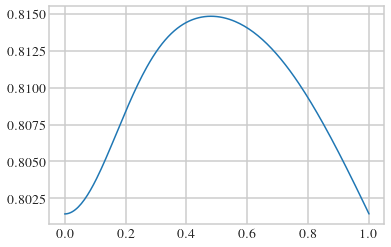

In [8]:
temp = df.loc[(df['sqz'] >= 0.309) & (df['sqz'] <= 0.311)]
plt.plot(temp['ra'], temp['VN_Entropy'])
plt.show()

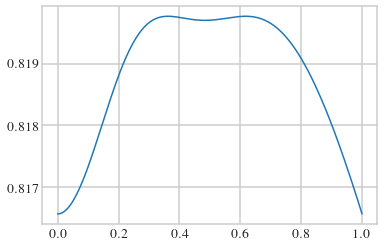

In [9]:
temp = df.loc[(df['sqz'] >= 0.314) & (df['sqz'] <= 0.316)]
plt.plot(temp['ra'], temp['VN_Entropy'])
plt.show()

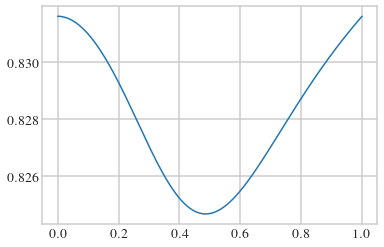

In [10]:
temp = df.loc[(df['sqz'] >= 0.319) & (df['sqz'] <= 0.324)]
plt.plot(temp['ra'], temp['VN_Entropy'])
plt.show()

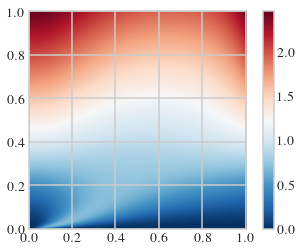

In [11]:
vn = df['VN_Entropy'].values.reshape(201, 201)
plt.imshow(vn, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1.0])
plt.colorbar()
plt.show()

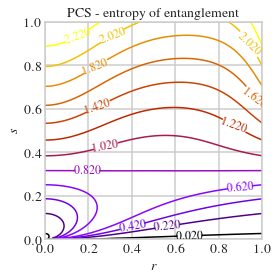

In [15]:
from matplotlib import cm

vn = df['VN_Entropy'].values.reshape(201, 201)
rs = df['ra'].values.reshape(201, 201)
ss = df['sqz'].values.reshape(201, 201)

fig = plt.contour(rs, ss, vn, 
                  levels=np.arange(0.02, 2.42, 0.2),
                  cmap='gnuplot')
plt.clabel(fig, inline=1, fontsize=12)
plt.axes().set_aspect('equal')
plt.title('PCS - entropy of entanglement')
plt.xlabel('$r$')
plt.ylabel('$s$')
plt.show()

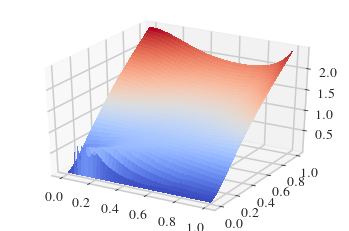

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
surf = ax.plot_surface(rs, ss, vn, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

In [60]:
table = pd.pivot_table(df, values='VN_Entropy', index=['ra'], columns=['lambda'])

In [65]:
list_lmd, list_ra, list_etgl = [], [], []
for lmd in table.columns.values:
    col = table[lmd]
    list_lmd.append(lmd)
    list_ra.append(0 if col.idxmax() == 1 else col.idxmax())
    list_etgl.append(col.max())

(0, 2.8)

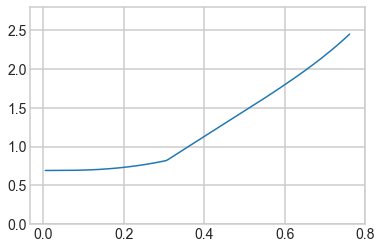

In [79]:
plt.plot(list_lmd[1:], list_etgl[1:])
plt.ylim(0, 2.8)

(-0.1, 0.7)

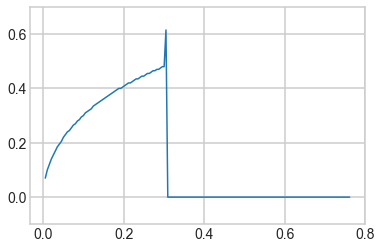

In [82]:
plt.plot(list_lmd[1:], list_ra[1:])
plt.ylim(-0.1, 0.7)

In [89]:
l1 = table.loc[0.000, :]
l2 = table.loc[1.000, :]

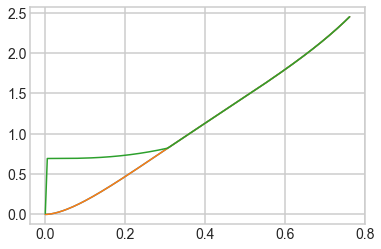

In [92]:
plt.plot(list_lmd, l1)
plt.plot(list_lmd, l2)
plt.plot(list_lmd, list_etgl)